# MO1 Aggregate 2 Label 454

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [2]:
load_stl.load_aggregate('C:\\Users\\dschmidt\\Documents\\GitHub\\Cuttings\\MO1_Agg2_Label454.stl')

Number of points: 464904
Number of elements:
  triangle: 935060

In [3]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('MO1_Agg2_Label454.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[0.01718  0.025858 0.015253]
 [0.017178 0.02586  0.015253]
 [0.01718  0.02586  0.015253]
 ...
 [0.016478 0.023411 0.020874]
 [0.016442 0.023429 0.020873]
 [0.01646  0.023429 0.020874]]


In [4]:
print(aggregate_coord.shape)

(464904, 3)


## 2) Bounding box

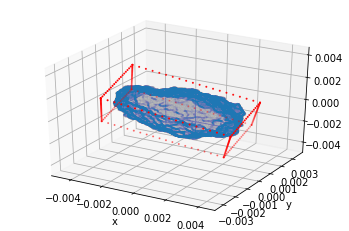

In [5]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [6]:
print(bbox_aggregate)

{'angles': array([ 0.5499398 , -0.42517823]), 'volume': 1.1571513376453978e-07}


## 3) Bounding ellipsoid

In [6]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, 1e-13)

In [11]:
print(bounding_ellipsoid)

{'volume': 1.3455990420308465e-07, 'a': 0.004743594921063172, 'b': 0.001836059299934886, 'c': 0.0036883553919544888, 'bbox': {'angles': array([ 0.5499398 , -0.42517823]), 'volume': 1.1571513376453978e-07}}


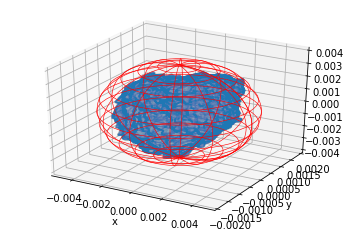

In [12]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 0.0001)

## 4) Included ellipsoid

In [7]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-13)

In [14]:
print(included_ellipsoid)

{'volume': 1.251279329721287e-08, 'a': 0.0021490860037491157, 'b': 0.0008318267915379018, 'c': 0.0016710096628414057, 'bbox': {'angles': array([ 0.5499398 , -0.42517823]), 'volume': 1.1571513376453978e-07}}


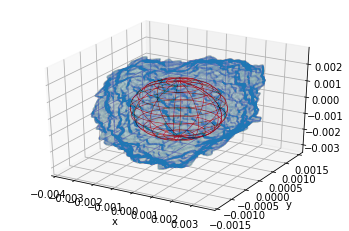

In [15]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 0.0001)

## 5) Middle ellipsoid

In [8]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [17]:
print(middle_ellipsoid)

{'volume': 5.160210522777147e-08, 'a': 0.0034463404624061438, 'b': 0.001333943045736394, 'c': 0.0026796825273979474}


## 6) Indicators

In [4]:
reload(bf)
reload(ic)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\Cuttings\\plot.py'>

In [9]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [11]:
tomo_surface = 0.000102
tomo_volume = 5.1209827489629e-008

Aggregate standard sphericity =  0.6538119106219172
Bounding box and ellispoids ratios :
a/b = 2.5835739190076263
a/c = 1.2861002850784136
b/c = 0.4977989116612604
a^2/bc = 3.3227351537568626
Bounding ellipsoid surface / Included ellipsoid surface = 4.87200358573662
Aggregate tomographed surface / Bounding ellipsoid surface = 0.7027984521516427
Aggregate tomographed surface / Middle ellipsoid surface = 1.3314646150902738
Aggregate tomographed surface / Included ellipsoid surface = 3.4240365789329497
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004125855304479161
 
data min max
theta 9.05320541162236e-05 6.283005275975088
phi 0.002255910846636103 3.1394937879887754
alpha 0.0002338962502225812 6.282720183283554
beta 0.002699246335586001 3.139081315055125
distance -0.0014573650656490127 0.0014284206291427992


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

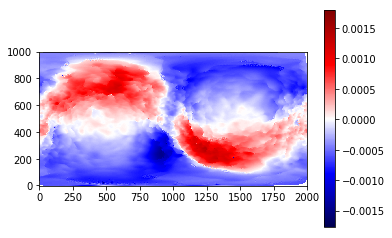

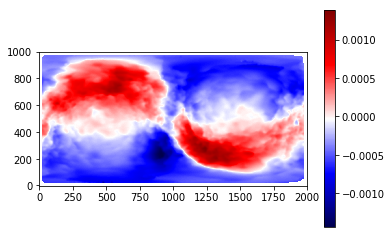

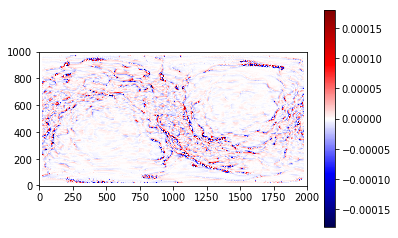

{'aggregate_standard_sphericity': 0.6538119106219172,
 'a/b': 2.5835739190076263,
 'a/c': 1.2861002850784136,
 'b/c': 0.4977989116612604,
 'a^2/bc': 3.3227351537568626,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 4.87200358573662,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.7027984521516427,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.3314646150902738,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 3.4240365789329497,
 'roughness_distance': array([[1.89859528e+00, 2.73467054e+00, 8.26336310e-04, 1.70167071e+00,
         2.45076068e+00],
        [1.89961981e+00, 2.73391286e+00, 8.28243851e-04, 1.70210572e+00,
         2.44988077e+00],
        [1.89806706e+00, 2.73410518e+00, 8.28095664e-04, 1.70144653e+00,
         2.44992343e+00],
        ...,
        [4.01086275e+00, 5.44822584e-01, 1.03064747e-03, 4.39632401e+00,
         7.74459168e-01],
        [3.98791683e+00, 5.47575036e-01, 1.02138464e-03, 4.38236364e+00,
         

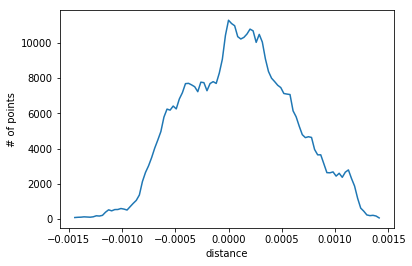

In [13]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.0018, sigma=5)

Aggregate standard sphericity =  0.6538119106219172
Bounding box and ellispoids ratios :
a/b = 2.5835739190076263
a/c = 1.2861002850784136
b/c = 0.4977989116612604
a^2/bc = 3.3227351537568626
Bounding ellipsoid surface / Included ellipsoid surface = 4.87200358573662
Aggregate tomographed surface / Bounding ellipsoid surface = 0.7027984521516427
Aggregate tomographed surface / Middle ellipsoid surface = 1.3314646150902738
Aggregate tomographed surface / Included ellipsoid surface = 3.4240365789329497
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.0004125855304479161
 
data min max
theta 9.05320541162236e-05 6.283005275975088
phi 0.002255910846636103 3.1394937879887754
alpha 0.0002338962502225812 6.282720183283554
beta 0.002699246335586001 3.139081315055125
distance -0.0014573650656490127 0.0014284206291427992


C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None


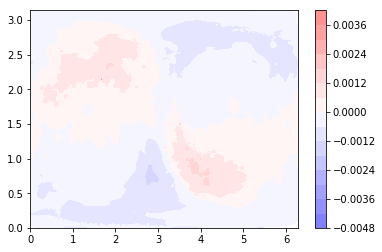

{'aggregate_standard_sphericity': 0.6538119106219172,
 'a/b': 2.5835739190076263,
 'a/c': 1.2861002850784136,
 'b/c': 0.4977989116612604,
 'a^2/bc': 3.3227351537568626,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 4.87200358573662,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.7027984521516427,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.3314646150902738,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 3.4240365789329497,
 'roughness_distance': array([[1.89859528e+00, 2.73467054e+00, 8.26336310e-04, 1.70167071e+00,
         2.45076068e+00],
        [1.89961981e+00, 2.73391286e+00, 8.28243851e-04, 1.70210572e+00,
         2.44988077e+00],
        [1.89806706e+00, 2.73410518e+00, 8.28095664e-04, 1.70144653e+00,
         2.44992343e+00],
        ...,
        [4.01086275e+00, 5.44822584e-01, 1.03064747e-03, 4.39632401e+00,
         7.74459168e-01],
        [3.98791683e+00, 5.47575036e-01, 1.02138464e-03, 4.38236364e+00,
         

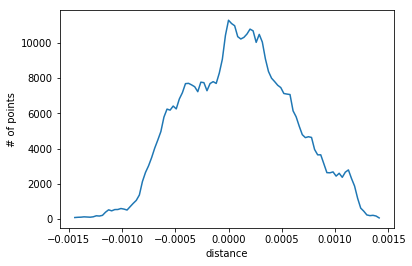

In [20]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.018)